In [ ]:
!brew install gcc@9
!python3 -c 'import mujoco_py'

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 3 taps (heroku/brew, homebrew/core and homebrew/cask).
==> New Formulae
akku                       jbang                      psysh
ansible@6                  joker                      python-gdbm@3.11
aptos                      jreleaser                  python-lsp-server
aribb24                    jscpd                      python-tk@3.11
bindgen                    keploy                     python@3.11
bossa                      kubefirst                  quartz-wm
brpc                       kubent                     retdec
btrfs-progs                kubevious                  rnr
buf                        kustomizer                 ruby@3.1
busted                     kwctl                      ruff
bzip3                      lemmeknow                  sapling
cargo-about                libdivide                  secp256k1
cargo-deny                 libemf2svg                 seven-kingdoms
cascadia        

Update them from Software Update in System Preferences.

If that doesn't show you any updates, run:
  sudo rm -rf /Library/Developer/CommandLineTools
  sudo xcode-select --install

Alternatively, manually download them from:
  https://developer.apple.com/download/all/.
You should download the Command Line Tools for Xcode 11.3.1.

==> Installing dependencies for gcc@9: isl, mpfr and libmpc
==> Installing gcc@9 dependency: isl
Please update to Xcode 11.3.1 (or delete it).
Xcode can be updated from the App Store.

Update them from Software Update in System Preferences.

If that doesn't show you any updates, run:
  sudo rm -rf /Library/Developer/CommandLineTools
  sudo xcode-select --install

Alternatively, manually download them from:
  https://developer.apple.com/download/all/.
You should download the Command Line Tools for Xcode 11.3.1.

==> Patching
==> Applying configure-big_sur.diff
patching file configure
Hunk #1 succeeded at 13866 (offset 5133 lines).
==> ./configure --prefix=/usr/

In [26]:
import os
import sys
from collections import deque

import numpy as np
import matplotlib.pyplot as plt

import gym
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# configure module & syspath
module_path = os.path.abspath(os.path.join('../'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.agents import ContinuousActionSpaceAgent
from src.policies import InvertedPendulumPolicy

In [27]:
class NormalizedActions(gym.ActionWrapper):

    def action(self, action):
        action = (action + 1) / 2  # [-1, 1] => [0, 1]
        action *= (self.action_space.high - self.action_space.low)
        action += self.action_space.low
        return action

    def reverse_action(self, action):
        action -= self.action_space.low
        action /= (self.action_space.high - self.action_space.low)
        action = action * 2 - 1
        return actions

In [28]:
env = gym.make('InvertedPendulum-v4')

rewards_queue = deque()
rewards_ma = list()

agent = ContinuousActionSpaceAgent(
    InvertedPendulumPolicy(env.observation_space.shape[0]),
    discount_factor = 0.99,
    use_baseline = False
)

optimizer = optim.Adam(agent.policy.parameters(), lr = 0.01)
max_episodes = 1000
max_trajectory_length = 200

for _ in tqdm(range(max_episodes)):
    state, _ = env.reset()

    for t in range(max_trajectory_length):
        action = agent.act(torch.from_numpy(state.astype(np.float32)))
        print(action)
        state, reward, done, _, _ = env.step(action)
        agent.rewards.append(reward)

        if done:
            break

    agent.tune(optimizer)
    total_reward = sum(agent.rewards)
    agent.reset()

    if len(rewards_queue) > 50:
        rewards_queue.popleft()
        
    if total_reward > 195.0:
        print('Solved.')
        plt.plot(rewards_ma)
        break

    rewards_queue.append(total_reward)
    mean_reward = np.mean(rewards_queue)
    rewards_ma.append(mean_reward)

DependencyNotInstalled: No module named 'mujoco'. (HINT: you need to install mujoco)

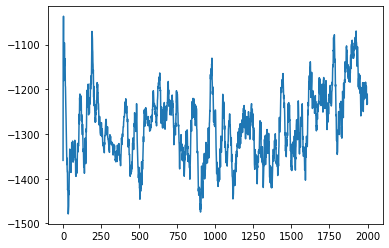

In [4]:
plt.plot(rewards_ma)